In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)

qc = QuantumCircuit(q, c)



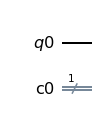

In [2]:
qc.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

In [4]:
psi1 = Statevector(qc)  # inital (ground) state
psi1.draw('latex')

<IPython.core.display.Latex object>

In [5]:
from qiskit.visualization import plot_state_qsphere

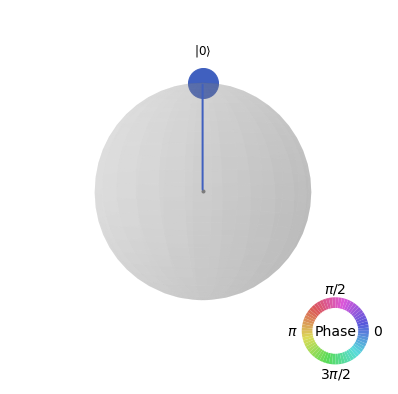

In [6]:
plot_state_qsphere(qc)

In [7]:
from qiskit.quantum_info import DensityMatrix

In [8]:
rho1 = DensityMatrix(qc)
rho1.draw('latex', prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

In [9]:
from qiskit.visualization import plot_state_city

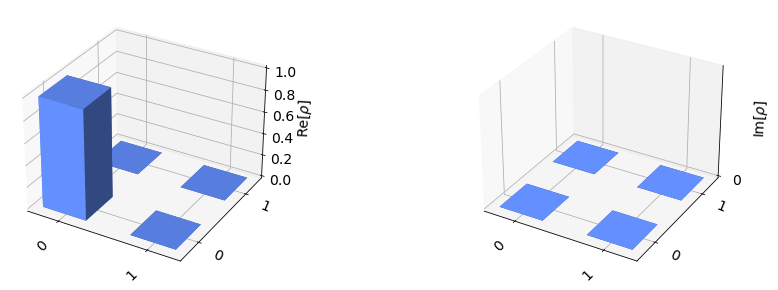

In [10]:
plot_state_city(qc)

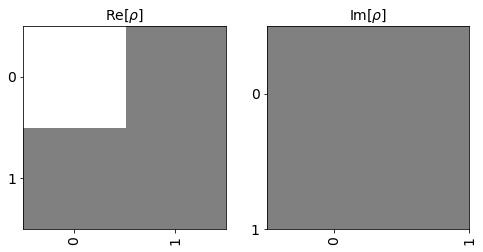

In [11]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

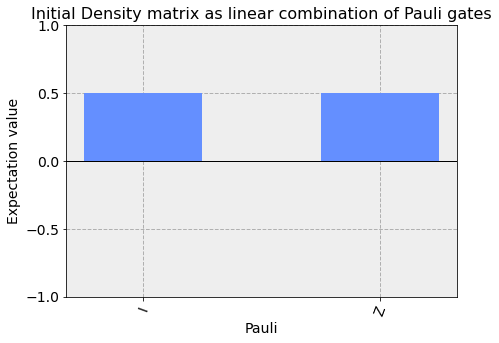

In [12]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc, title='Initial Density matrix as linear combination of Pauli gates')

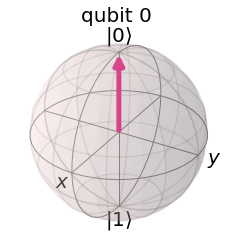

In [13]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [14]:
purity = rho1.purity()
print(purity)

(1+0j)


In [15]:
from math import pi

In [16]:
qc.rx(pi/2, q[0])     ## apply Rx gate and choose theta = pi/2

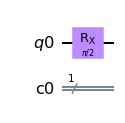

In [17]:
qc.draw('mpl')

In [18]:
psi2 = Statevector(qc)   ## final state Psi_f 
psi2.draw('latex')

<IPython.core.display.Latex object>

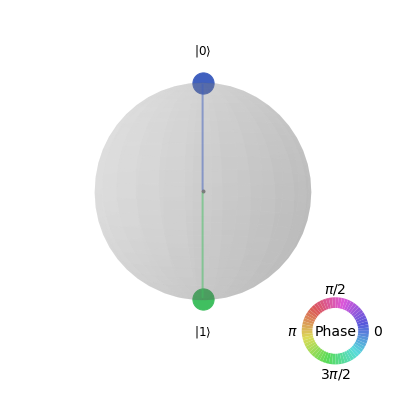

In [19]:
plot_state_qsphere(qc)

In [20]:
rho2 = DensityMatrix(qc)
rho2.draw('latex', prefix='\\rho_2 = ')

<IPython.core.display.Latex object>

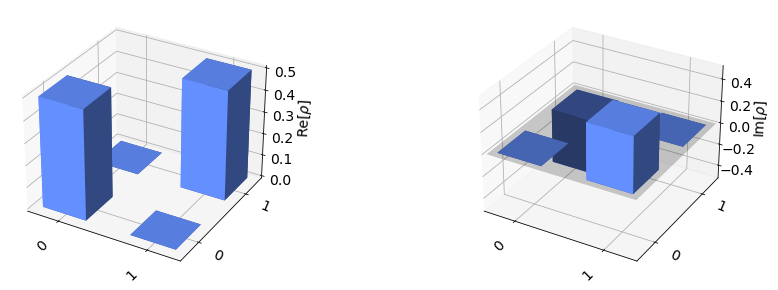

In [21]:
plot_state_city(qc)

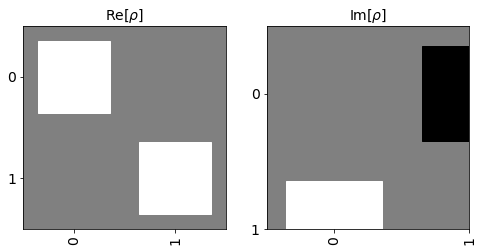

In [22]:
plot_state_hinton(qc)

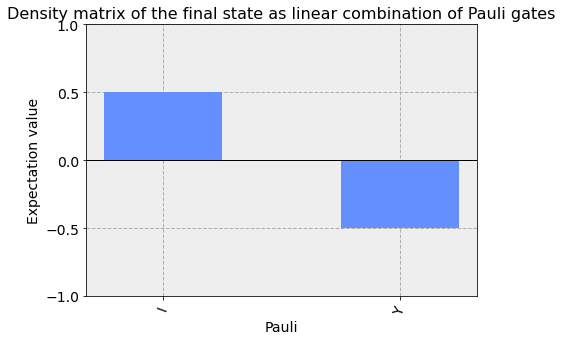

In [23]:
plot_state_paulivec(qc, title='Density matrix of the final state as linear combination of Pauli gates')

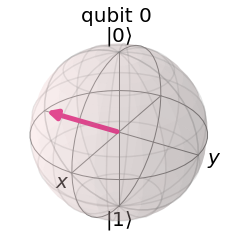

In [24]:
plot_bloch_multivector(qc)

In [25]:
purity_f = rho2.purity()
print(purity_f)

(1+0j)


In [26]:
from qiskit.quantum_info import state_fidelity 
fidelity = state_fidelity(psi1, psi2)

In [27]:
print(fidelity)

0.5000000000000001


In [28]:
fidelity_using_density_matrix = state_fidelity(rho1, rho2)
print(fidelity_using_density_matrix)

0.5000000000000001


In [29]:
qc.measure(q[0], c[0])

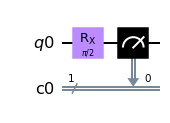

In [30]:
qc.draw('mpl')

In [31]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)  
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 505, '1': 519}


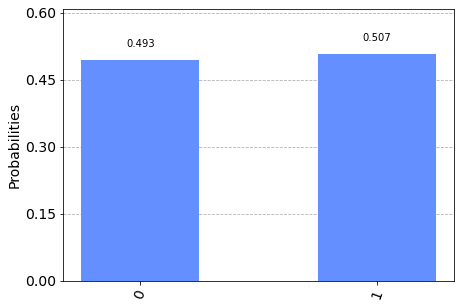

In [32]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)